In [ ]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 10, 13]
SUBJECT = "Xianyu"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_X.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Finish Training! (Model is saved)
Maximum training accuracy : 89.09%
Maximum validation accuracy : 87.21%
Accuracy of test dataset using model V0: 87.2093%
Dataset 3/18 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.9567%
Dataset 4/18 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 49.6840%
Dataset 5/18 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 75.0786%
Dataset 6/18 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.4560%
Dataset 7/18 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Accuracy on unseen dataset: 88.3254%
Dataset 8/18 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Accuracy on unseen dataset: 55.8726%
Dataset 9/18 - Session Exp_2025-07-01-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 64.2758%
Dataset 10/18 - Session Exp_2025-07-01-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.6144%
Dataset 11/18 - Session Exp_2025-07-02-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 64.8863%
Dataset 12/18 

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_X.csv')

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/18 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.06%
Maximum validation accuracy : 83.66%

Dataset 2/18 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.46%
Maximum validation accuracy : 86.43%

Dataset 3/18 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.15%
Maximum validation accuracy : 85.22%

Dataset 4/18 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 67.06%
Maximum validation accuracy : 71.98%

Dataset 5/18 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.81%
Maximum validatio

In [5]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 17.72%
Average of acc using previous test data after training: 70.39%
Average of acc using current test data after training: 83.78%
K-1: 75.61% | Target: 83.79
K-4: 75.96% | Target: 84.35
K-7: 77.63% | Target: 83.84
K-10: 78.49% | Target: 83.92
K-13: 79.84% | Target: 86.55


In [6]:
Trained_acc_all

[0.8366256356239319,
 0.8643144965171814,
 0.8521863222122192,
 0.7198033928871155,
 0.8706595301628113,
 0.8576230406761169,
 0.8582037687301636,
 0.8169811367988586,
 0.8389339447021484,
 0.8519805669784546,
 0.8000488877296448,
 0.7368055582046509,
 0.849686861038208,
 0.868182897567749,
 0.8490609526634216,
 0.8729899525642395,
 0.8862109184265137,
 0.8509749174118042]

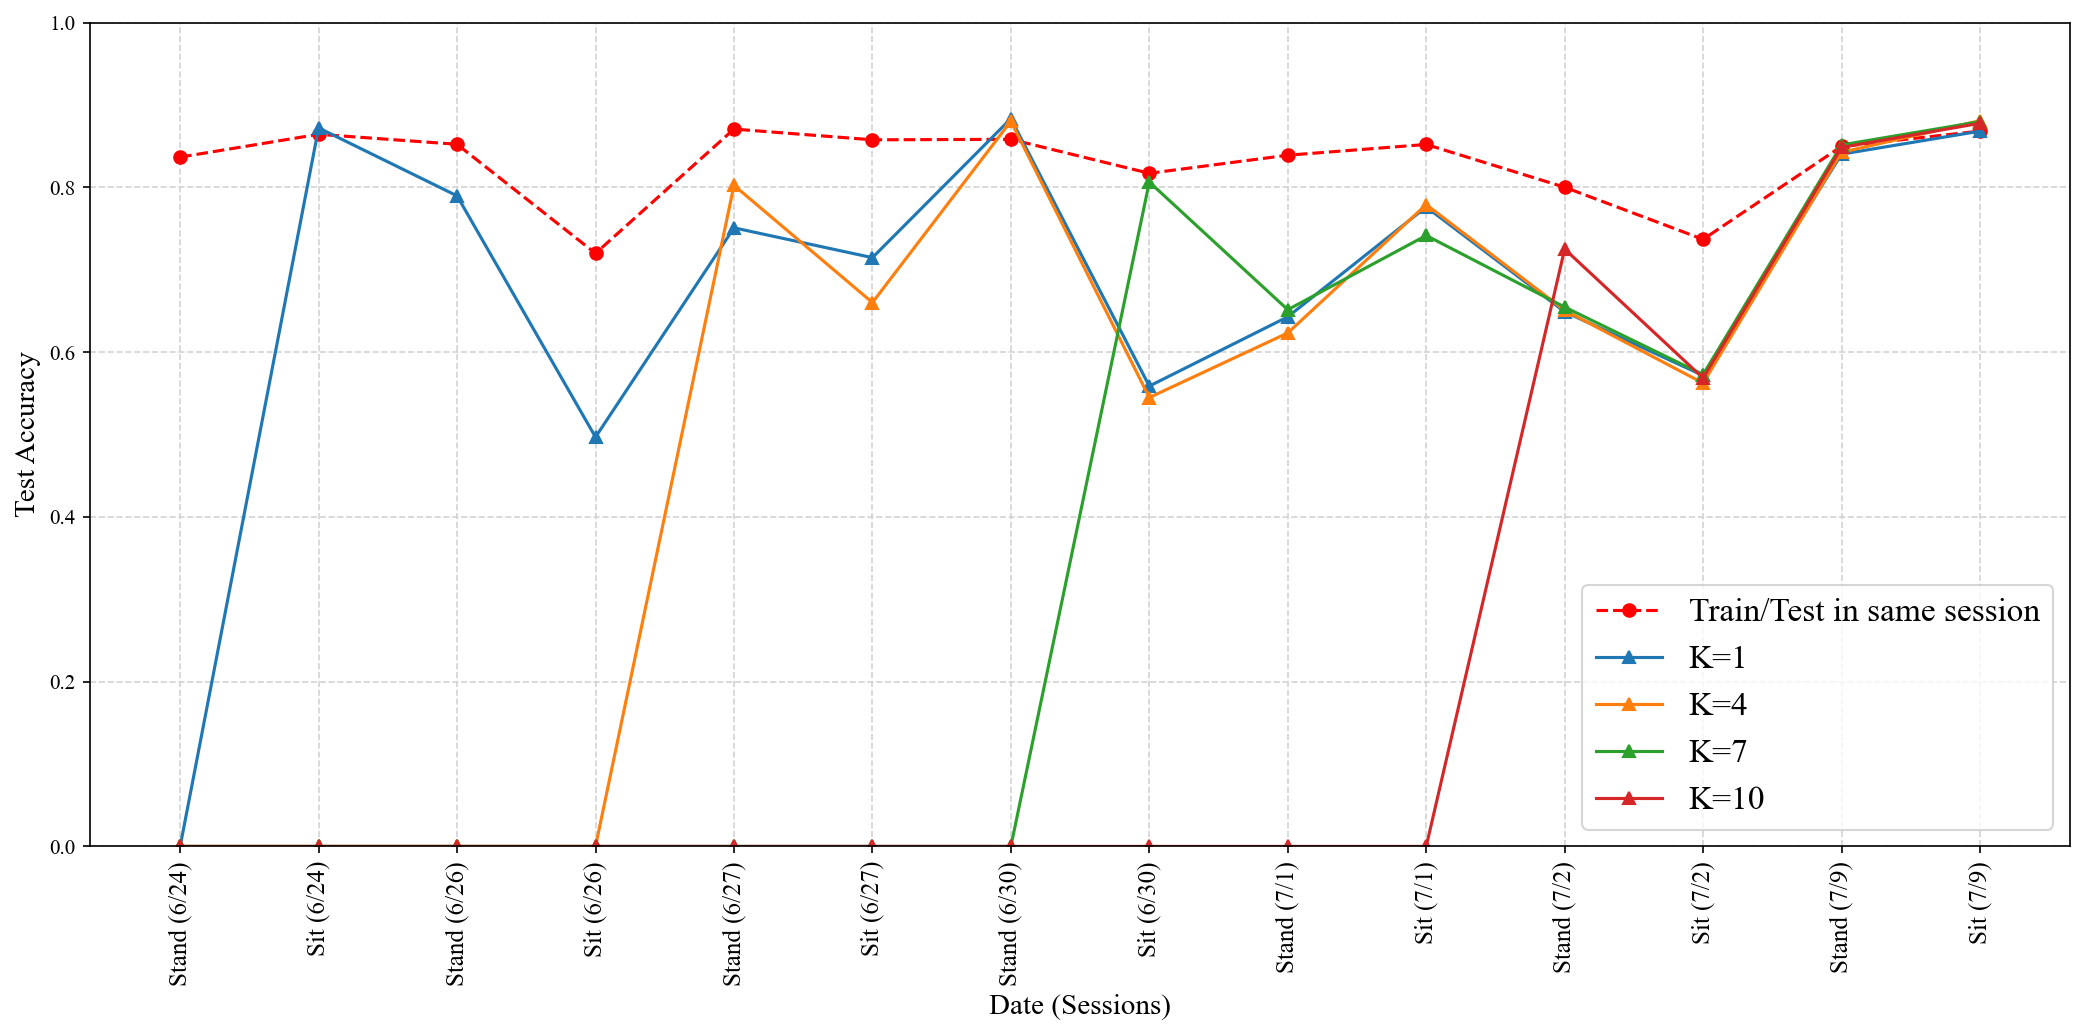

In [10]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8366256356239319, 0.8643144965171814, 0.8521863222122192, 0.7198033928871155, 0.8706595301628113, 0.8576230406761169, 0.8582037687301636, 0.8169811367988586, 0.8389339447021484, 0.8519805669784546, 0.8000488877296448, 0.7368055582046509, 0.849686861038208, 0.868182897567749,
 0.8490609526634216, 0.8729899525642395, 0.8862109184265137, 0.8509749174118042]

X_labels = ['Stand (6/24)', 'Sit (6/24)', 'Stand (6/26)', 'Sit (6/26)', 'Stand (6/27)', 'Sit (6/27)',
       'Stand (6/30)', 'Sit (6/30)', 'Stand (7/1)', 'Sit (7/1)', 'Stand (7/2)', 'Sit (7/2)', 'Stand (7/9)',
       'Sit (7/9)', 'Stand (7/11)', 'Sit (7/11)', 'Stand (7/23)', 'Sit (7/23)']#, 'Stand (8/12)', 'Sit (8/12)', 'Stand (8/13)', 'Sit (8/13)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored[:-4], c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines[:-1]):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels[:-4], baseline_result['Accuracy'][:-4] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1)
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()